In [2]:
#! pip install citipy

In [3]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from Config import weather_api_key

from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [5]:
city_name = []
lattitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
index_counter = 0
set_counter = 1 

In [6]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# Cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lattitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : barrow
Processing Record 3 of Set 1 : arraial do cabo
Processing Record 4 of Set 1 : tuatapere
Processing Record 5 of Set 1 : dwarka
Processing Record 6 of Set 1 : solone
Processing Record 7 of Set 1 : bengkulu
Processing Record 8 of Set 1 : chokurdakh
Processing Record 9 of Set 1 : mataura
Processing Record 10 of Set 1 : te anau
Processing Record 11 of Set 1 : puerto leguizamo
Processing Record 12 of Set 1 : mabaruma
Processing Record 13 of Set 1 : kodiak
Processing Record 14 of Set 1 : richards bay
Processing Record 15 of Set 1 : rikitea
Processing Record 16 of Set 1 : dikson
Processing Record 17 of Set 1 : hithadhoo
Processing Record 18 of Set 1 : solvychegodsk
Processing Record 19 of Set 1 : carnarvon
Processing Record 20 of Set 1 : werda
Processing Record 21 of Set 1 : zhigansk
Processing Record 22 of Set 1 : anloga
City not found. Skipping...
Processi

Processing Record 35 of Set 4 : diplo
Processing Record 36 of Set 4 : hvide sande
Processing Record 37 of Set 4 : mana
Processing Record 38 of Set 4 : vanavara
Processing Record 39 of Set 4 : bani walid
Processing Record 40 of Set 4 : nizhniy kuranakh
Processing Record 41 of Set 4 : sobolevo
Processing Record 42 of Set 4 : xai-xai
Processing Record 43 of Set 4 : jalu
Processing Record 44 of Set 4 : chapais
Processing Record 45 of Set 4 : lakes entrance
Processing Record 46 of Set 4 : prince albert
City not found. Skipping...
Processing Record 47 of Set 4 : ancud
Processing Record 48 of Set 4 : nuuk
Processing Record 49 of Set 4 : cidreira
Processing Record 50 of Set 4 : road town
Processing Record 0 of Set 5 : natal
Processing Record 1 of Set 5 : kavaratti
Processing Record 2 of Set 5 : banyo
Processing Record 3 of Set 5 : kenai
Processing Record 4 of Set 5 : bogandinskiy
Processing Record 5 of Set 5 : fairlie
Processing Record 6 of Set 5 : beloha
City not found. Skipping...
Processing

Processing Record 20 of Set 8 : la ronge
Processing Record 21 of Set 8 : san antonio
Processing Record 22 of Set 8 : monroe
Processing Record 23 of Set 8 : ugoofaaru
Processing Record 24 of Set 8 : vila velha
Processing Record 25 of Set 8 : hammerfest
Processing Record 26 of Set 8 : pimenta bueno
Processing Record 27 of Set 8 : leo
Processing Record 28 of Set 8 : tomatlan
Processing Record 29 of Set 8 : bandar
Processing Record 30 of Set 8 : kamenka
Processing Record 31 of Set 8 : la orilla
Processing Record 32 of Set 8 : san pedro de macoris
Processing Record 33 of Set 8 : anadyr
Processing Record 34 of Set 8 : uvalde
Processing Record 35 of Set 8 : aquiraz
Processing Record 36 of Set 8 : darovskoy
Processing Record 37 of Set 8 : makokou
Processing Record 38 of Set 8 : miles city
Processing Record 39 of Set 8 : inhambane
Processing Record 40 of Set 8 : basco
Processing Record 41 of Set 8 : pringsewu
Processing Record 42 of Set 8 : ixtapa
Processing Record 43 of Set 8 : tombouctou
Proc

In [7]:
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lattitude,
                "Lng" : longitude,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date,
})

In [8]:
#Export the city data into a .csv.
weather_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [9]:
#.csv
weather_df.to_csv("output_data/cities.csv", index = False)

In [10]:
#Display the DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,37.40,86,20,14.99,CL,1596153191
1,Barrow,71.29,-156.79,37.40,93,90,8.05,US,1596153191
2,Arraial do Cabo,-22.97,-42.03,66.97,82,100,16.08,BR,1596153057
3,Tuatapere,-46.13,167.68,52.77,86,90,3.53,NZ,1596152925
4,Dwārka,22.24,68.97,84.58,80,100,10.45,IN,1596153191


In [11]:
 #Inspect the data and remove the cities where the humidity > 100%.
Humidity_df = weather_df['Humidity'].loc[weather_df['Humidity']>100]
Humidity_df

#Skip this step if there are no cities that have humidity > 100%.

Series([], Name: Humidity, dtype: int64)

#  Get the indices of cities that have humidity over 100%.
There are no cities that have humidity over 100%

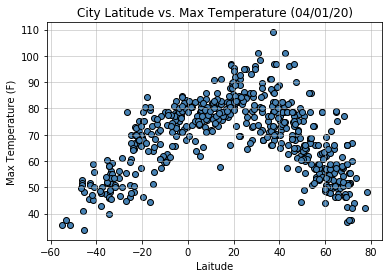

In [12]:
 #Latitude vs. Temperature Plot
    
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Max Temperature.png")

This code is finding City Latitude vs. Max Temp. The Max temp seems to be inbetween 20 and 40 latitude

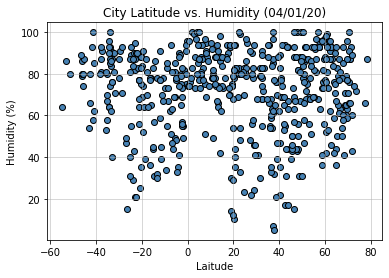

In [13]:
#Latitude vs. Humidity Plot

plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Humidity.png")

Finding the greatest humidity point. It seems to be a giant cluser from -40 to the middle of 60 and 80 lattitude of 60% humidity and above 

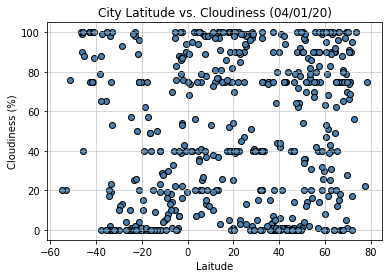

In [14]:
 #Latitude vs. Cloudiness Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Cloudiness.png")

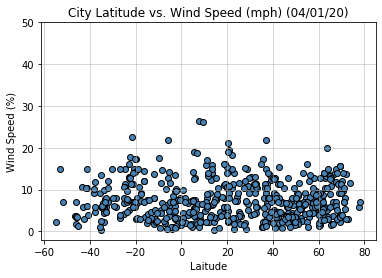

In [15]:
 #Latitude vs. Wind Speed Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Wind Speed (mph).png")

City Latitude vs wind speed For the cities within -60 to 80 laitude seem to not have much of a wind speed that goes above 20%

In [16]:
 #Linear Regression
 # OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [18]:
#regression start for plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.68


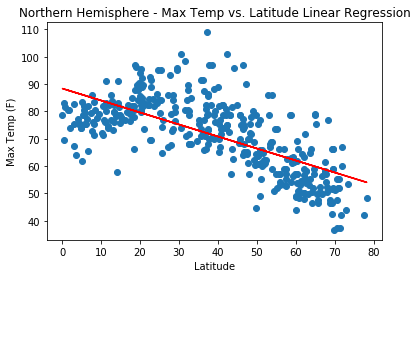

In [19]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.81


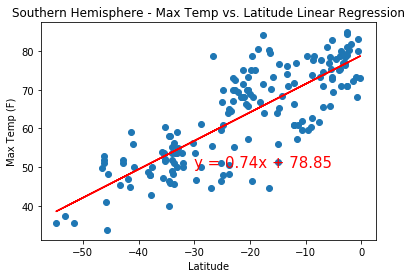

In [20]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

Northern vs Southern Max Temp vs Latitude Linear Regression:They seem to be going in opposite directions

The r-squared is : -0.06


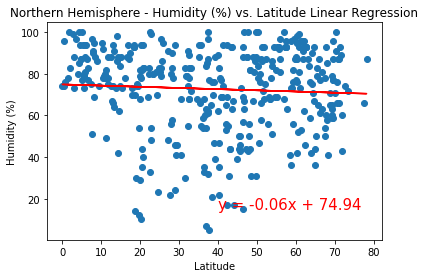

In [21]:
 #Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.21


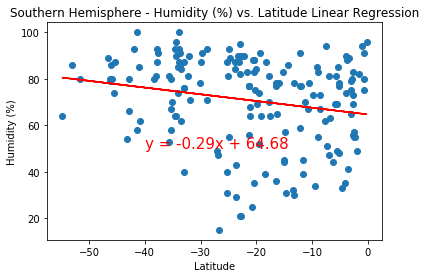

In [22]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

Northern vs Southern Humidity Linear Regression: There is much more humidity in the north then in the south

The r-squared is : -0.01


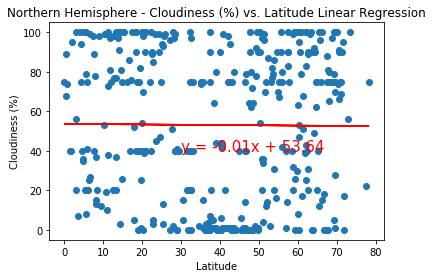

In [23]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.11


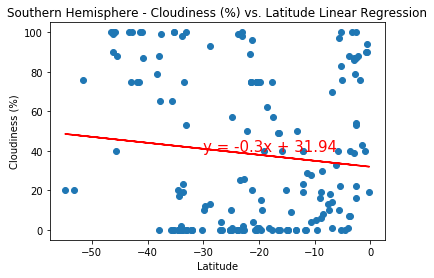

In [24]:
 #Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

Northern vs Souther Cloudiness Linear Regression: Seems to look like there is more cloudiness in the north then in the south

The r-squared is : -0.01


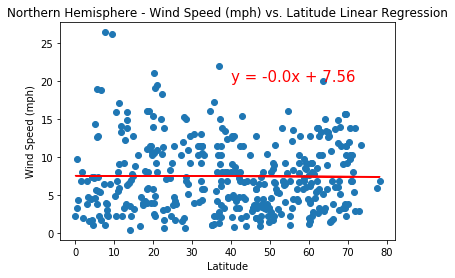

In [25]:
 #Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : -0.05


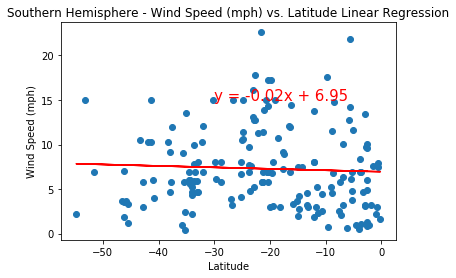

In [26]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

Northern vs Southern Wind Speed Linear Regression: Wind speed in the north seems to be mostly under 10mph while the south is more spread out to have low and higher wind speeds.